In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from statesim.generate.input import generate_random_static_input
import numpy as np
import matplotlib.pyplot as plt

In [23]:
T = 20
eta = 0.01
N = int(T / eta)
us = generate_random_static_input(
    N=N, nu=1, amplitude_range=(-10.0, 10.0), frequency_range=(50, 100)
)
t = np.linspace(0, T - eta, N)
# plt.plot(t, np.squeeze(np.array(us)))

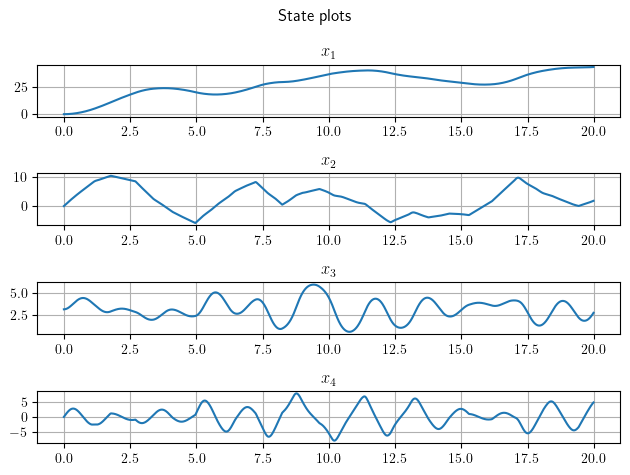

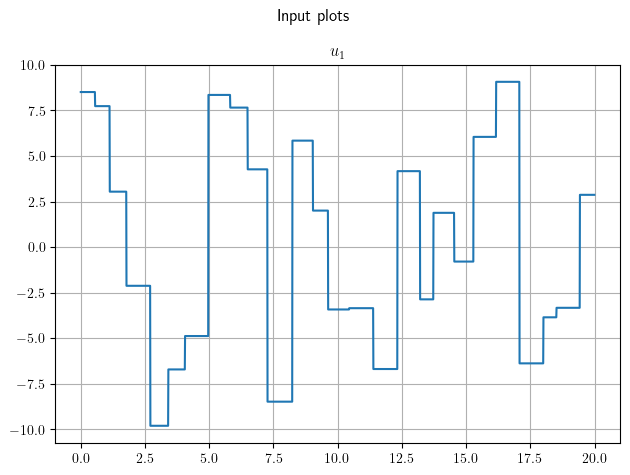

In [24]:
from statesim.simulator import ContinuousSimulator
from statesim.model.statespace import Nonlinear
from statesim.system.cartpole import CartPole
from statesim.analysis.plot_simulation_results import plot_states, plot_inputs

sys = CartPole(mu_p=0.01)
model = Nonlinear(
    f=sys.state_dynamics,
    g=sys.output_function,
    nx=sys.nx,
    nu=sys.nu,
    ny=sys.ny,
)
sim = ContinuousSimulator(T=T, step_size=eta)
result, _ = sim.simulate(
    model=model,
    initial_state=np.array([[0], [0], [np.pi], [0]]),
    input=us,
    name='nl cartpole random static input',
)
plot_states(result=result)
plot_inputs(result=result)